In [2]:
import pandas as pd

In [30]:
data = pd.read_csv(r'C:\Users\paula\OneDrive\Desktop\bears.csv')

In [36]:
data[' age'] = pd.to_numeric(data[' age'], errors='coerce')

In [37]:
data[' age'] = data[' age'].fillna(data[' age'].mean())

In [38]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

In [39]:
data = data.dropna(subset=['Latitude', 'Longitude'])

In [40]:
data = pd.get_dummies(data, columns=['Type', 'Type of bear'], drop_first=True)

In [41]:
data = data.drop(columns=['Name', 'Description', 'Location'])

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[' age'] = scaler.fit_transform(data[[' age']])

In [43]:
data.head()

,age,gender,Date,Month,Year,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude,Type_Wild,Type of bear_Brown bear,Type of bear_Polar Bear
0,-1.572740,female,19/05/1901,May,1901,0,0,0,0,38.864277,-79.556998,True,False,False
1,-1.477623,male,19/05/1901,May,1901,0,0,0,0,38.864277,-79.556998,True,False,False
2,-1.382507,male,19/05/1901,May,1901,0,0,0,0,38.864277,-79.556998,True,False,False
3,-0.859365,male,24/11/1906,Nov,1906,0,0,0,1,41.437362,-78.626009,True,False,False
4,-1.667856,male,05/10/1908,Oct,1908,0,0,0,1,32.222876,-110.974847,False,False,False


In [68]:
non_numeric_columns = data.select_dtypes(include=['object']).columns

In [69]:
print("Non-numeric columns that might still cause issues:", non_numeric_columns)

Non-numeric columns that might still cause issues: Index(['Date', 'Month'], dtype='object')


In [70]:
data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

In [73]:
print(data.dtypes)

 age         float64
Year           int64
Hunter         int64
Grizzly        int64
Hikers         int64
              ...   
Month_Mar       bool
Month_May       bool
Month_Nov       bool
Month_Oct       bool
Month_Sep       bool
Length: 129, dtype: object


In [74]:
print("Data types after encoding:")

Data types after encoding:


In [75]:
print(data.dtypes)

 age         float64
Year           int64
Hunter         int64
Grizzly        int64
Hikers         int64
              ...   
Month_Mar       bool
Month_May       bool
Month_Nov       bool
Month_Oct       bool
Month_Sep       bool
Length: 129, dtype: object


In [76]:
X = data.drop(columns=['Hunter'])

In [123]:
y = data['Hunter']

In [124]:
from imblearn.over_sampling import SMOTE

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
from sklearn.naive_bayes import GaussianNB

In [131]:
from sklearn.metrics import classification_report, accuracy_score

In [132]:
smote = SMOTE(random_state=42)

In [133]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [135]:
# Decision Tree Classifier

In [136]:
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [137]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [138]:
y_pred_dt = decision_tree.predict(X_test)

In [139]:
# Random Forest Classifier

In [140]:
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

In [141]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [142]:
y_pred_rf = random_forest.predict(X_test)

In [143]:
# Naive Bayes CLassifier

In [144]:
naive_bayes = GaussianNB()

In [145]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [146]:
y_pred_nb = naive_bayes.predict(X_test)

In [147]:
from sklearn.metrics import classification_report, accuracy_score

In [148]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.93      0.96      0.94        26

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.93        46
weighted avg       0.94      0.93      0.93        46

Accuracy: 0.9347826086956522


In [149]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        26

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

Accuracy: 1.0


In [150]:
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        20
           1       0.76      1.00      0.87        26

    accuracy                           0.83        46
   macro avg       0.88      0.80      0.81        46
weighted avg       0.87      0.83      0.82        46

Accuracy: 0.8260869565217391


In [153]:
import matplotlib.pyplot as plt

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

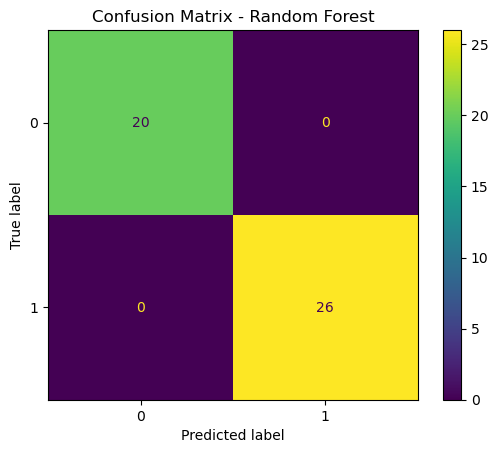

In [155]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [176]:
import matplotlib.pyplot as plt

In [177]:
attacks_per_year = data.groupby('Year').size()

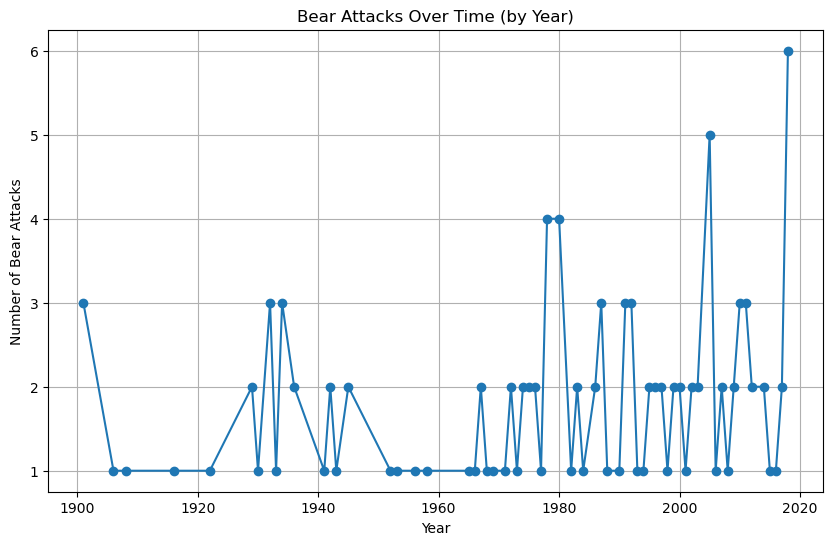

In [178]:
plt.figure(figsize=(10, 6))
attacks_per_year.plot(kind='line', marker='o')
plt.title('Bear Attacks Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Bear Attacks')
plt.grid(True)
plt.show()